In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
#dataset contains 10607 rows and 111 columns

In [ ]:
df_na=pd.DataFrame(df.isnull().sum()/len(df)*100,columns=["%_Na"])
df_na.reset_index(inplace=True,drop=False)

In [ ]:
df_na

,index,%_Na
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
...,...,...
106,tax_liens,0.098195
107,tot_hi_cred_lim,100.000000
108,total_bal_ex_mort,100.000000
109,total_bc_limit,100.000000


**deleteing columns with >50% null values**

In [ ]:
df_na.rename({"index":"columns"},inplace=True,axis=1)
df_na

,columns,%_Na
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
...,...,...
106,tax_liens,0.098195
107,tot_hi_cred_lim,100.000000
108,total_bal_ex_mort,100.000000
109,total_bc_limit,100.000000


In [ ]:
for i in df_na.index:
  if df_na.loc[i,"%_Na"]>50:
    del df[df_na.loc[i,"columns"]]

In [ ]:
df.shape

(39717, 54)

In [ ]:
df_na[(df_na["%_Na"]!=0)&(df_na["%_Na"]<50)]

,columns,%_Na
10,emp_title,6.191303
11,emp_length,2.706650
19,desc,32.580507
21,title,0.027696
33,revol_util,0.125891
45,last_pymnt_d,0.178765
48,last_credit_pull_d,0.005036
49,collections_12_mths_ex_med,0.140998
78,chargeoff_within_12_mths,0.140998
105,pub_rec_bankruptcies,1.754916


In [ ]:
len(df["desc"].unique())

26528

**desk column contains high portion of unique values**

In [ ]:
df.drop(["desc"],axis=1,inplace=True)

In [ ]:
print("no of records: {}\nno of unique values in emp_length : {}".format(len(df),len(df["emp_length"].unique())))

no of records: 39717
no of unique values in emp_length : 12


In [ ]:
print("no of records: {}\nno of unique values in emp_length : {}".format(len(df),len(df["emp_title"].unique())))

no of records: 39717
no of unique values in emp_length : 28821


**droppping emp_title because contains high unique values and will not add information on upper 3 steps**

In [ ]:
del df["emp_title"]

In [ ]:
df["title"].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [ ]:
df.drop(["title"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
df.drop(["id","member_id"],axis=1,inplace=True)

In [ ]:
df.drop(["url"],axis=1,inplace=True)

In [ ]:
unique_value=df.nunique()
unique_value

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                        82
initial_list_status         

**dropiing columns having single values**

In [ ]:
col_with_single_value=unique_value[unique_value.values==1]
col_to_drop=col_with_single_value.index.to_list()

In [ ]:
df.drop(col_to_drop,axis=1,inplace=True)

In [ ]:
df.shape

(39717, 39)

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
keep_list=["loan_amnt","funded_amnt","term",'int_rate','installment', 'grade',"sub_grade",'emp_length', 'home_ownership','annual_inc', 'verification_status', 'issue_d', 'loan_status','addr_state',"dti","earliest_cr_line","inq_last_6mths",'open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc',"out_prncp",'last_pymnt_d', 'last_pymnt_amnt',"pub_rec_bankruptcies"]

In [ ]:
drop_list=["funded_amnt_inv","delinq_2yrs","last_credit_pull_d","zip_code",'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries','out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv','collection_recovery_fee',
       'last_pymnt_d','last_credit_pull_d']

In [ ]:
df.drop(drop_list,inplace=True,axis=1)

In [ ]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
last_pymnt_amnt         0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [ ]:
df["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
df["emp_length"]=df["emp_length"].fillna("self_employement")

In [ ]:
df["revol_util"].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [ ]:
df["revol_util"]=df["revol_util"].replace("%","")


In [ ]:
df["revol_util"]=df["revol_util"].astype=("float")


In [ ]:
df["revol_util"]=df["revol_util"].fillna(df["revol_util"].mean())

TypeError: ignored

In [ ]:
#df.drop("last_pymnt_d",axis=1,inplace=True)

In [ ]:
df["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

In [ ]:
df["pub_rec_bankruptcies"].dtypes


dtype('float64')

In [ ]:
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].fillna(df["pub_rec_bankruptcies"].mean())

In [ ]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
dtype: int64

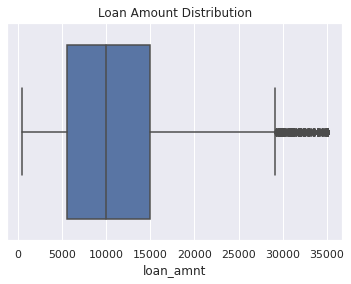

In [ ]:
sns.set()
sns.boxplot(df["loan_amnt"])
plt.title("Loan Amount Distribution")
plt.show()

In [ ]:
#most loan amount is btw 5500 to 15000

In [ ]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [ ]:
df=df[df["loan_status"]!="Current"]

In [ ]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

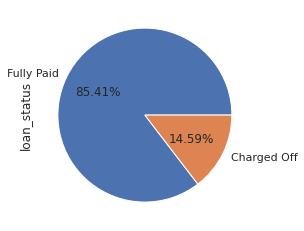

In [ ]:
df["loan_status"].value_counts().plot(kind="pie",autopct="%.2f%%")

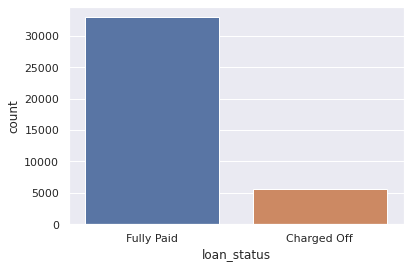

In [ ]:
sns.countplot(df["loan_status"])

In [ ]:

#purpose vs loan status
#grade vs loan status
#term vs loan status
#home ownership vs loan status
#state vs loan ststus
#verification vs loan status
#intrest rate distribution
#grade vs interest rate
#loan funded per Year
#matplot loan amount funded amount
#loan amount vs annual income ratio
#pupose and amt corresponding to each loan status
#bank currpcies vs loan status
#total creadit lines